# Deep learning

## Imports

In [31]:
import mglearn
import json
import numpy as np
import pandas as pd
from collections import OrderedDict
import torch
import torchvision
from torch import nn, optim
from torchvision import transforms, models, datasets
from PIL import Image
from sklearn.linear_model import LogisticRegression
from torchvision import datasets, models, transforms, utils
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler

## Learning outcomes 
From this module, you will be able to 

<br><br>

- Very popular these days under the name deep learning.
- Neural networks apply a sequence of transformations on your input data.
- They can be viewed a generalization of linear models where we apply a series of transformations.
- Here is graphical representation of a logistic regression model.
- We have 4 features: x[0], x[1], x[2], x[3]

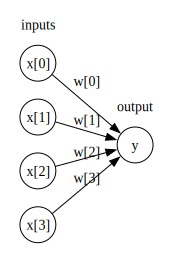

In [2]:
import mglearn

mglearn.plots.plot_logistic_regression_graph()

- Below we are adding one "layer" of transformations in between features and the target. 
- We are repeating the the process of computing the weighted sum multiple times.  
- The **hidden units** (e.g., h[1], h[2], ...) represent the intermediate processing steps. 

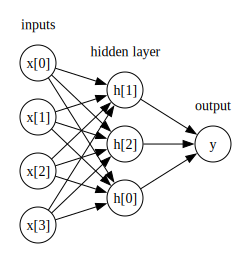

In [3]:
mglearn.plots.plot_single_hidden_layer_graph()

- Now we are adding one more layer of transformations. 

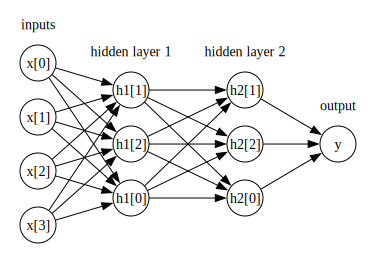

In [4]:
mglearn.plots.plot_two_hidden_layer_graph()

- A neural network is a model that's sort of like its own pipeline
  - It involves a series of transformations ("layers") internally. 
  - The output is the prediction.

- With a neural net, you specify the number of features after each transformation.
  - In the above, it goes from 4 to 3 to 3 to 1.

- To make them really powerful compared to the linear models, we apply a non-linear function to the weighted sum for each hidden node. 

### Terminology

- Neural network = neural net
- Deep learning ~ using neural networks

### Why neural networks?

- They can learn very complex functions.
  - The fundamental tradeoff is primarily controlled by the **number of layers** and **layer sizes**.
  - More layers / bigger layers --> more complex model.
  - You can generally get a model that will not underfit. 

- The work really well for structured data:
  - 1D sequence, e.g. timeseries, language
  - 2D image
  - 3D image or video
- They've had some incredible successes in the last 10 years.
- Transfer learning (coming later today) is really useful.  

### Why not neural networks?

- Often they require a lot of data.
- They require a lot of compute time, and, to be faster, specialized hardware called [GPUs](https://en.wikipedia.org/wiki/Graphics_processing_unit).
- They have huge numbers of hyperparameters are a huge pain to tune.
  - Think of each layer having hyperparameters, plus some overall hyperparameters.
  - Being slow compounds this problem.
- They are not interpretable.
- I don't recommend training them on your own without further training

  - Good news
    - You don't have to train your models from scratch in order to use them.
    - I'll show you some ways to use neural networks without training them yourselves. 

### Deep learning software
- The current big players are:

1. [PyTorch](http://pytorch.org)
2. [TensorFlow](https://www.tensorflow.org)

- Both are heavily used in industry.
- If interested, see [comparison of deep learning software](https://en.wikipedia.org/wiki/Comparison_of_deep_learning_software).


### Image classification

- Have you used search in Google Photos?
- You can search for "my photos of cat" and it will retrieve photos from your libraries containing cats.
- This can be done using **image classification**.
- Image classification refers to predicting objects in images. It's treated as a supervised learning problem, where we define a set of target classes (objects to identify in images), and train a model to recognize them using labeled example photos.
- This is not an easy problem because of the variations in the location of the object, lighting, background, camera angle, camera focus etc.
 
![](img/cat_variation.png)

[Source](https://developers.google.com/machine-learning/practica/image-classification)

A significant advancement in image classification was the application of **convolutional neural networks** (ConvNets or CNNs) to this problem. 
- [ImageNet Classification with Deep Convolutional
Neural Networks](https://proceedings.neurips.cc/paper_files/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf)
- Achieved a winning test error rate of 15.3%, compared to 26.2% achieved by the second-best entry in the ILSVRC-2012 competition. 


- In practice, very few people train an entire CNN from scratch because it requires a large dataset, powerful computers, and a huge amount of human effort to train the model.

- Instead, a common practice is to download a pre-trained model and fine tune it for your task. This is called **transfer learning**.

- Transfer learning is one of the most common techniques used in the context of computer vision and natural language processing.

- It refers to using a model already trained on one task as a starting point for learning to perform another task

- There are many famous deep learning architectures out there that have been very successful across a wide range of problems, e.g.: [AlexNet](https://arxiv.org/abs/1404.5997), [VGG](https://arxiv.org/abs/1409.1556), [ResNet](https://arxiv.org/abs/1512.03385), [Inception](https://arxiv.org/abs/1512.00567), [MobileNet](https://arxiv.org/abs/1801.04381), etc.

- Many of these models have been pre-trained on famous datasets like ImageNet [[1](https://www.image-net.org/index.php), [2](https://en.wikipedia.org/wiki/ImageNet)]


**[ImageNet](https://www.image-net.org/about.php)**

- [ImageNet](http://www.image-net.org/) is an image dataset that became a very popular benchmark in the field ~10 years ago. 

- Currently contains ~14 million labelled images with ~21,841 categories
  
- There are various versions with different number of images and classes
    - ILSVRC, a popular annual competition in computer vision, uses a smaller subset of ImageNet. This subset consists of about 1.2 million training images, 50,000 validation images, and 150,000 testing images across 1,000 categories. 

- [Wikipedia article](https://en.wikipedia.org/wiki/ImageNet) on ImageNet
- Here are some example classes. 

In [5]:
with open("data/imagenet_classes.txt") as f:
    classes = [line.strip() for line in f.readlines()]
classes[100:110]

['black swan, Cygnus atratus',
 'tusker',
 'echidna, spiny anteater, anteater',
 'platypus, duckbill, duckbilled platypus, duck-billed platypus, Ornithorhynchus anatinus',
 'wallaby, brush kangaroo',
 'koala, koala bear, kangaroo bear, native bear, Phascolarctos cinereus',
 'wombat',
 'jellyfish',
 'sea anemone, anemone',
 'brain coral']

- The idea of transfer learning is instead of developing a machine learning model from scratch, you use these available pre-trained models for your tasks either directly or by fine tuning them. 
- There are three common ways to use transfer learning in computer vision 
    1. Using pre-trained models out-of-the-box 
    2. Using pre-trained models as feature extractor and training your own model with these features
    2. Starting with weights of pre-trained models and fine-tuning the weights for your task. 
- We will explore the first two approaches.     

### Using pre-trained models out-of-the-box 

- Let's first try one of these models and apply it to our own problem right out of the box

![](img/cnn-ex.png)

Source: https://cezannec.github.io/Convolutional_Neural_Networks/

- We can easily download famous models using the `torchvision.models` module. All models are available with pre-trained weights (based on ImageNet's 224 x 224 images)

- Remember this example demo from the supervised learning module?
    - We used a pre-trained model vgg16 which is trained on the ImageNet data. 
    - We preprocess the given image. 
    - We get prediction from this pre-trained model on a given image along with prediction probabilities.  
    - For a given image, this model will spit out one of the 1000 classes from ImageNet. 

In [7]:
def classify_image(img, topn = 4):
    clf = vgg16(weights='VGG16_Weights.DEFAULT') # initialize the classifier with VGG16 weights
    preprocess = transforms.Compose([
                 transforms.Resize(299),
                 transforms.CenterCrop(299),
                 transforms.ToTensor(),
                 transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                                     std=[0.229, 0.224, 0.225]),])

    with open('data/imagenet_classes.txt') as f:
        classes = [line.strip() for line in f.readlines()]
    
    img_t = preprocess(img)
    batch_t = torch.unsqueeze(img_t, 0)
    clf.eval()
    output = clf(batch_t)
    _, indices = torch.sort(output, descending=True)
    probabilities = torch.nn.functional.softmax(output, dim=1)
    d = {'Class': [classes[idx] for idx in indices[0][:topn]], 
         'Probability score': [np.round(probabilities[0, idx].item(),3) for idx in indices[0][:topn]]}
    df = pd.DataFrame(d, columns = ['Class','Probability score'])
    return df

In [8]:
import torch
from PIL import Image
from torchvision import transforms
from torchvision.models import vgg16

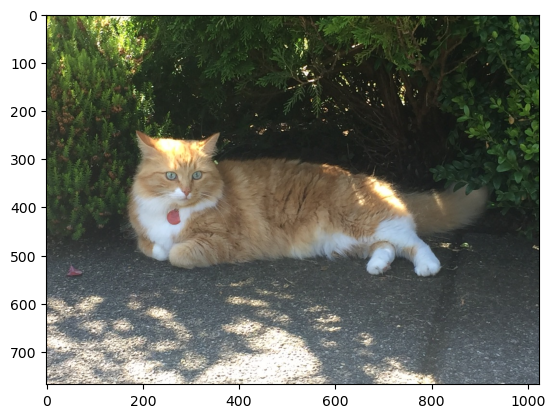

                         Class  Probability score
                     tiger cat              0.353
              tabby, tabby cat              0.207
               lynx, catamount              0.050
Pembroke, Pembroke Welsh corgi              0.046
--------------------------------------------------------------


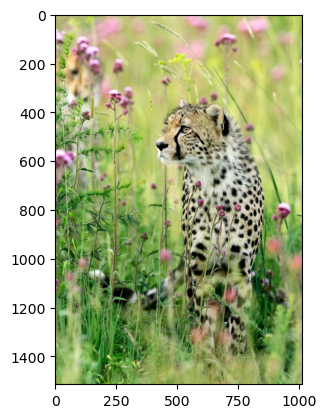

                                     Class  Probability score
         cheetah, chetah, Acinonyx jubatus              0.983
                  leopard, Panthera pardus              0.012
jaguar, panther, Panthera onca, Felis onca              0.004
       snow leopard, ounce, Panthera uncia              0.001
--------------------------------------------------------------


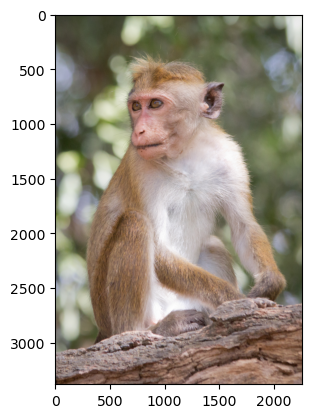

                                   Class  Probability score
                                 macaque              0.714
patas, hussar monkey, Erythrocebus patas              0.122
      proboscis monkey, Nasalis larvatus              0.098
                   guenon, guenon monkey              0.017
--------------------------------------------------------------


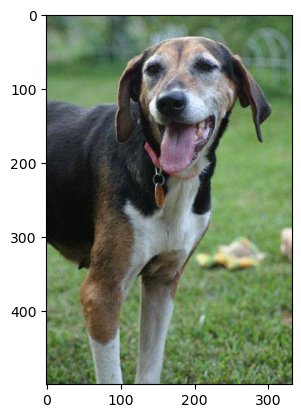

                        Class  Probability score
Walker hound, Walker foxhound              0.580
             English foxhound              0.091
                  EntleBucher              0.080
                       beagle              0.065
--------------------------------------------------------------


In [9]:
# Predict labels with associated probabilities for unseen images
import glob
import matplotlib.pyplot as plt
images = glob.glob("data/test_images/*.*")
for image in images:
    img = Image.open(image)
    img.load()
    plt.imshow(img)
    plt.show()
    df = classify_image(img)
    print(df.to_string(index=False))
    print("--------------------------------------------------------------")

- We got these predictions without "doing the ML ourselves".
  
- We are using **pre-trained** `vgg16` model which is available in `torchvision`.
  
- `torchvision` has many such pre-trained models available that have been very successful across a wide range of tasks: AlexNet, VGG, ResNet, Inception, MobileNet, etc.
- Many of these models have been pre-trained on famous datasets like **ImageNet**. 
- So if we use them out-of-the-box, they will give us one of the ImageNet classes as classification. 

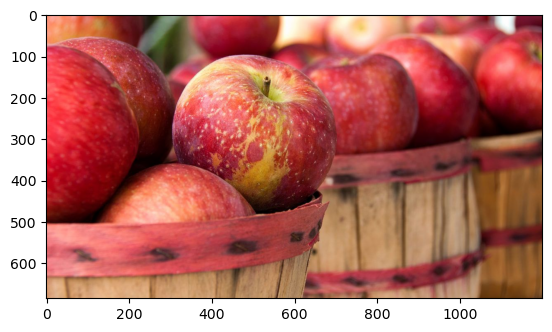

                                      Class  Probability score
                                        fig              0.637
                                pomegranate              0.193
grocery store, grocery, food market, market              0.041
                                      crate              0.023
--------------------------------------------------------------


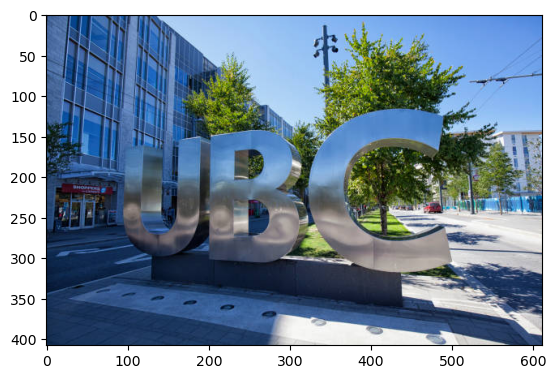

                                               Class  Probability score
                                         toilet seat              0.171
                                          safety pin              0.060
bannister, banister, balustrade, balusters, handrail              0.039
                                              bubble              0.035
--------------------------------------------------------------


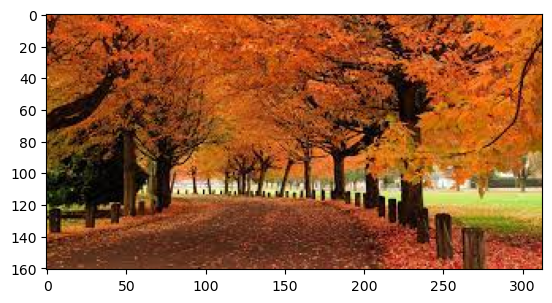

                                                    Class  Probability score
worm fence, snake fence, snake-rail fence, Virginia fence              0.202
                                                     barn              0.036
                                                   sorrel              0.033
                                             valley, vale              0.029
--------------------------------------------------------------


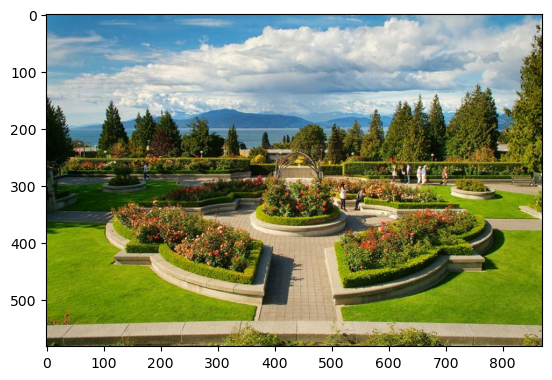

              Class  Probability score
     patio, terrace              0.213
           fountain              0.164
lakeside, lakeshore              0.097
            sundial              0.088
--------------------------------------------------------------


In [10]:
# Predict labels with associated probabilities for unseen images
images = glob.glob("data/UBC_img/*.*")
for image in images:
    img = Image.open(image)
    img.load()
    plt.imshow(img)
    plt.show()
    df = classify_image(img)
    print(df.to_string(index=False))
    print("--------------------------------------------------------------")

- It's not doing very well here because ImageNet don't have proper classes for these images.
  
- Here we are using pre-trained models out-of-the-box. 
- Can we use pre-trained models for our own classification problem with our classes? 
- Yes!! There are two ways to benefit from transfer learning:

    1. Use a pre-trained network as a "**feature extractor**" and add new layers to it for your own task

    2. Same as the previous one, but also "**fine-tune**" the weights of the pre-trained network using your own data

### Using pre-trained models as feature extractors

- In this method, we use a pre-trained model as a "feature extractor" which creates useful features for us that we can use to train some other model

- We have two options here:

    1. Add some extra layers to the pre-trained network to suit our particular task

    2. Pass training data through the network and save the output to use as features for training some other model

- Let's use pre-trained models to extract features.
- We will pass our specific data through a pre-trained network to get a feature vector for each example in the data. 
- The feature vector is usually extracted from the last layer, before the classification layer from the pre-trained network. 
- You can think of each layer a transformer applying some transformations on the input received to that later. 

![](img/cnn-ex.png)

Source: https://cezannec.github.io/Convolutional_Neural_Networks/

- Once we extract these feature vectors for all images in our training data, we can train a machine learning classifier such as logistic regression or random forest. 
- This classifier will be trained on our classes using feature representations extracted from the pre-trained models.  
- Let's try this out. 
- It's better to train such models with GPU. Since our dataset is quite small, we won't have problems running it on a CPU. 

In [11]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device.type}")

Using device: cpu


### Reading the data

- Let's read the data. Before we just used 1 colour channel because we wanted to flatten the representation.
- Here, I'm using all three colour channels. 
- Let's read and prepare the data. (You are not expected to understand this code.)

In [14]:
# Attribution: [Code from PyTorch docs](https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html?highlight=transfer%20learning)

import os

IMAGE_SIZE = 200
BATCH_SIZE = 64

data_transforms = {
    "train": transforms.Compose(
        [
            # transforms.RandomResizedCrop(224),
            # transforms.RandomHorizontalFlip(),
            transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),     
            transforms.ToTensor(),
            #transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
            transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5]),            
        ]
    ),
    "valid": transforms.Compose(
        [
            # transforms.Resize(256),
            # transforms.CenterCrop(224),
            transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),                        
            transforms.ToTensor(),
            # transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
            transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5]),                        
        ]
    ),
}
data_dir = "data/animal_faces"
image_datasets = {
    x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x])
    for x in ["train", "valid"]
}
dataloaders = {
    x: torch.utils.data.DataLoader(
        image_datasets[x], batch_size=BATCH_SIZE, shuffle=True, num_workers=4
    )
    for x in ["train", "valid"]
}
dataset_sizes = {x: len(image_datasets[x]) for x in ["train", "valid"]}
class_names = image_datasets["train"].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [15]:
# Get a batch of training data
inputs, classes = next(iter(dataloaders["train"]))

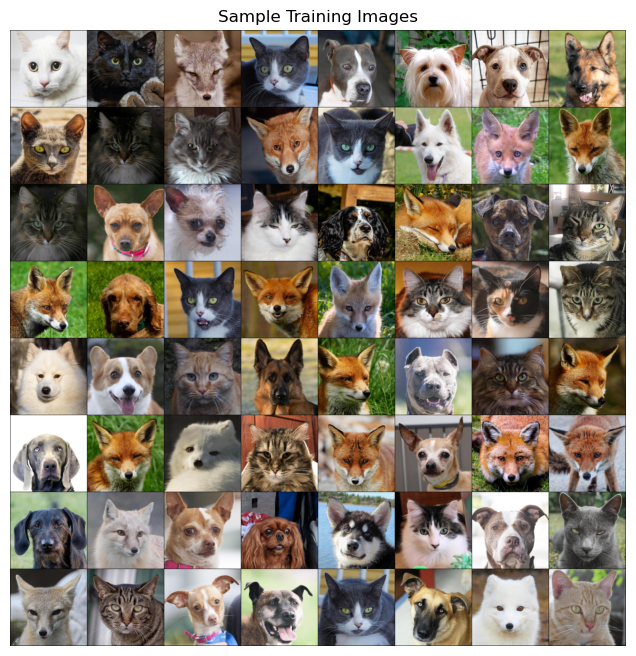

In [18]:
plt.figure(figsize=(10, 8)); plt.axis("off"); plt.title("Sample Training Images")
plt.imshow(np.transpose(utils.make_grid(inputs, padding=1, normalize=True),(1, 2, 0)));

In [19]:
print(f"Classes: {image_datasets['train'].classes}")
print(f"Class count: {image_datasets['train'].targets.count(0)}, {image_datasets['train'].targets.count(1)}, {image_datasets['train'].targets.count(2)}")
print(f"Samples:", len(image_datasets["train"]))
print(f"First sample: {image_datasets['train'].samples[0]}")

Classes: ['cat', 'dog', 'wild']
Class count: 50, 50, 50
Samples: 150
First sample: ('data/animal_faces/train/cat/flickr_cat_000002.jpg', 0)


- Now for each image in our dataset, we'll extract a feature vector from a pre-trained model called densenet121, which is trained on the ImageNet dataset.  

In [20]:
def get_features(model, train_loader, valid_loader):
    """Extract output of squeezenet model"""
    with torch.no_grad():  # turn off computational graph stuff
        Z_train = torch.empty((0, 1024))  # Initialize empty tensors
        y_train = torch.empty((0))
        Z_valid = torch.empty((0, 1024))
        y_valid = torch.empty((0))
        for X, y in train_loader:
            Z_train = torch.cat((Z_train, model(X)), dim=0)
            y_train = torch.cat((y_train, y))
        for X, y in valid_loader:
            Z_valid = torch.cat((Z_valid, model(X)), dim=0)
            y_valid = torch.cat((y_valid, y))
    return Z_train.detach(), y_train.detach(), Z_valid.detach(), y_valid.detach()

In [21]:
densenet = models.densenet121(weights="DenseNet121_Weights.IMAGENET1K_V1")
densenet.classifier = nn.Identity()  # remove that last "classification" layer

In [22]:
Z_train, y_train, Z_valid, y_valid = get_features(
    densenet, dataloaders["train"], dataloaders["valid"]
)

Now we have extracted feature vectors for all examples. What's the shape of these features?

In [50]:
Z_train.shape

torch.Size([150, 1024])

The size of each feature vector is 1024 because the size of the last layer in densenet architecture is 1024.  

![](img/densenet-architecture.png)

Source: https://towardsdatascience.com/understanding-and-visualizing-densenets-7f688092391a

Let's examine the feature vectors. 

In [25]:
pd.DataFrame(Z_train).head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.000214,0.003613,0.002841,0.004053,0.158620,0.662796,0.000317,0.004947,0.212560,0.000297,...,0.774497,0.400307,0.653430,1.581800,1.351940,2.043742,1.469017,1.230662,4.872244,0.819636
1,0.000208,0.003551,0.003457,0.001789,0.076098,0.316023,0.000743,0.004922,0.169637,0.000246,...,0.544158,1.326674,0.136031,1.402709,2.307208,0.591386,1.543126,1.552839,1.143265,0.108370
2,0.000189,0.001657,0.004246,0.000975,0.108164,1.089845,0.000451,0.002756,0.176052,0.000344,...,0.919156,1.126956,0.985111,0.538022,0.052035,0.115337,0.567419,1.825701,2.469780,2.706936
3,0.000159,0.001512,0.002391,0.001276,0.071748,0.596524,0.000572,0.002557,0.173304,0.000203,...,0.295363,0.387801,0.441605,0.241866,1.312916,2.606359,2.198973,1.880606,0.810585,0.348636
4,0.000723,0.007543,0.002766,0.001696,0.145111,0.869753,0.000088,0.005522,0.533374,0.000423,...,1.151114,0.795380,5.189768,0.721791,0.643757,0.430313,0.015297,1.729235,0.163042,2.799905


- The features are hard to interpret but they have some important information about the images which can be useful for classification.  
- Let's try out logistic regression on these extracted features. 

In [32]:
pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=2000))
pipe.fit(Z_train, y_train)
pipe.score(Z_train, y_train)

1.0

In [33]:
pipe.score(Z_valid, y_valid)

0.9066666666666666

- This is great accuracy for so little data (we only have 150 examples) and little effort of all different types of animals!!!
- With logistic regression and flattened representation of images we got an accuracy of 0.66. 

<br><br>

## Random cool stuff

- [A nice video](https://www.youtube.com/watch?v=oGvHtpJMO3M) which gives a high-level introduction to computer vision.
- Style transfer: given a "content image" and a "style image", create a new image with the content of one and the style of the other.
  - Here is the [original paper from 2015](https://arxiv.org/pdf/1508.06576.pdf), see Figure 2.
  - Here are more in [this 2016 paper](https://arxiv.org/pdf/1601.04589.pdf); see, e.g. Figures 1 and 7.
  - This has been done for video as well; see [this video from 2016](https://www.youtube.com/watch?v=Khuj4ASldmU).
- [Image captioning](https://cs.stanford.edu/people/karpathy/sfmltalk.pdf): Transfer learning with NLP and vision 
- Colourization: see [this 2016 project](http://iizuka.cs.tsukuba.ac.jp/projects/colorization/en/).
- Inceptionism: let the neural network "make things up"
  - [2015 article](https://ai.googleblog.com/2015/06/inceptionism-going-deeper-into-neural.html)
  - "Deep dream" [video from 2015](https://www.youtube.com/watch?v=dbQh1I_uvjo).
